In [12]:
! pip install ace_tools

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import ace_tools as tools

ModuleNotFoundError: No module named 'ace_tools'

In [2]:
print(os.getcwd())  # Print the current working directory

c:\Users\Ankit\Documents\Milestone II project\Milestone_2\Vizs


In [3]:

# Define the correct data folder
data_folder = r"c:\Users\Ankit\Documents\Milestone II project\Milestone_2\Data"

# List of years from 2009 to 2022
years = list(range(2009, 2023))

# Initialize an empty list to store DataFrames
dfs = []

# Loop through each year's file, read it, and append to the list
for year in years:
    file_path = os.path.join(data_folder, f"{year}_census_data.csv")
    if os.path.exists(file_path):  # Ensure the file exists
        df = pd.read_csv(file_path)
        df["Year"] = year  # Add a column to identify the year
        dfs.append(df)
        print(f"Loaded {year}_census_data.csv with {df.shape[0]} rows.")
    else:
        print(f"File {year}_census_data.csv not found, skipping.")

# Concatenate all DataFrames
if dfs:
    merged_df = pd.concat(dfs, ignore_index=True)
    
    # Save the merged dataset
    output_file = os.path.join(data_folder, "merged_census_data.csv")
    merged_df.to_csv(output_file, index=False)
    
    print(f"Merged dataset saved to {output_file} with {merged_df.shape[0]} total rows.")
else:
    print("No valid files found. Ensure the CSV files exist.")

# Display the first few rows of the merged DataFrame
merged_df.head()


Loaded 2009_census_data.csv with 3221 rows.
Loaded 2010_census_data.csv with 3221 rows.
Loaded 2011_census_data.csv with 3221 rows.
Loaded 2012_census_data.csv with 3221 rows.
Loaded 2013_census_data.csv with 3221 rows.
Loaded 2014_census_data.csv with 3220 rows.
Loaded 2015_census_data.csv with 3220 rows.
Loaded 2016_census_data.csv with 3220 rows.
Loaded 2017_census_data.csv with 3220 rows.
Loaded 2018_census_data.csv with 3220 rows.
Loaded 2019_census_data.csv with 3220 rows.
Loaded 2020_census_data.csv with 3221 rows.
Loaded 2021_census_data.csv with 3221 rows.
Loaded 2022_census_data.csv with 3222 rows.
Merged dataset saved to c:\Users\Ankit\Documents\Milestone II project\Milestone_2\Data\merged_census_data.csv with 45089 total rows.


,mil pop,unemployment %,mean income,median income,vacant housing units,rental vacany rate,% below poverty line,median house value,NAME,state,county,county_name,state_name,Year
0,16.0,(X),50181.0,87.0,498.0,3.8,(X),145300.0,"Jefferson County, Idaho",16,51,Jefferson County,Idaho,2009
1,13.0,(X),40322.0,47.0,663.0,4.7,(X),130600.0,"Jerome County, Idaho",16,53,Jerome County,Idaho,2009
2,12.0,(X),45446.0,1072.0,6212.0,3.5,(X),213000.0,"Kootenai County, Idaho",16,55,Kootenai County,Idaho,2009
3,29.0,(X),36448.0,196.0,1050.0,5.4,(X),173200.0,"Latah County, Idaho",16,57,Latah County,Idaho,2009
4,0.0,(X),38750.0,69.0,1136.0,8.5,(X),171400.0,"Lemhi County, Idaho",16,59,Lemhi County,Idaho,2009


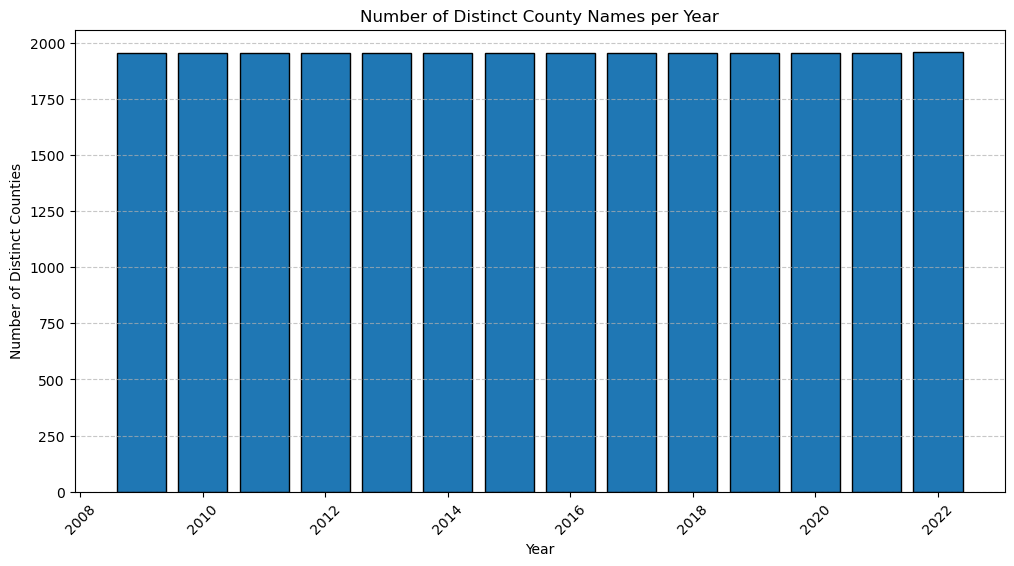

In [4]:
# Load the merged dataset
data_folder = r"c:\Users\Ankit\Documents\Milestone II project\Milestone_2\Data"
merged_file = os.path.join(data_folder, "merged_census_data.csv")

# Read the merged CSV
df = pd.read_csv(merged_file)

# Count distinct county names per year
distinct_counties = df.groupby("Year")["county_name"].nunique()

# Plot histogram
plt.figure(figsize=(12, 6))
plt.bar(distinct_counties.index, distinct_counties.values, edgecolor="black")
plt.xlabel("Year")
plt.ylabel("Number of Distinct Counties")
plt.title("Number of Distinct County Names per Year")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()


In [20]:
distinct_counties = df.groupby("Year")["county_name"].nunique()
distinct_counties

Year
2009    1955
2010    1955
2011    1955
2012    1955
2013    1955
2014    1954
2015    1955
2016    1955
2017    1955
2018    1955
2019    1955
2020    1956
2021    1956
2022    1960
Name: county_name, dtype: int64

In [15]:
# Ensure 'mil pop' is numeric
df["mil pop"] = pd.to_numeric(df["mil pop"], errors='coerce')

# Identify valid years for each county where 'mil pop' is non-zero
valid_years_per_county = df[df["mil pop"] > 0].groupby("county_name")["Year"].unique()

# Filter the dataframe to keep only rows where the year is in the valid years list for that county
df_filtered = df[df.apply(lambda row: row["Year"] in valid_years_per_county.get(row["county_name"], []), axis=1)]




# number of distinct counties has remained same in the data over the years in the data.

In [5]:
df.describe

<bound method NDFrame.describe of        mil pop unemployment %  mean income  median income  \
0         16.0            (X)      50181.0           87.0   
1         13.0            (X)      40322.0           47.0   
2         12.0            (X)      45446.0         1072.0   
3         29.0            (X)      36448.0          196.0   
4          0.0            (X)      38750.0           69.0   
...        ...            ...          ...            ...   
45084     19.0           16.3      37287.0        23701.0   
45085      0.0           13.1      21821.0        17062.0   
45086     19.0           13.9      33109.0        22461.0   
45087     31.0           11.1      27239.0        19972.0   
45088      0.0           13.5      29101.0        19827.0   

       vacant housing units  rental vacany rate % below poverty line  \
0                     498.0                 3.8                  (X)   
1                     663.0                 4.7                  (X)   
2                

In [6]:
import pandas as pd
import os

# Load the merged dataset
data_folder = r"c:\Users\Ankit\Documents\Milestone II project\Milestone_2\Data"
merged_file = os.path.join(data_folder, "merged_census_data.csv")

# Read the dataset
df = pd.read_csv(merged_file)

# Convert numeric columns to the correct data type
numeric_columns = [
    "mil pop", "unemployment %", "mean income", "median income",
    "vacant housing units", "rental vacany rate", "% below poverty line",
    "median house value"
]

# Convert columns to numeric to avoid aggregation errors
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Compute the median value for each column grouped by year
median_values = df.groupby("Year")[numeric_columns].median()

# Display the results in the notebook
from IPython.display import display
display(median_values)


,mil pop,unemployment %,mean income,median income,vacant housing units,rental vacany rate,% below poverty line,median house value
Year,,,,,,,,
2009,17.0,NaN,41322.0,121.0,1772.0,7.20,NaN,102000.0
2010,16.0,7.30,53667.0,42224.0,1836.0,7.30,10.60,105400.0
2011,15.0,8.00,55326.0,43194.0,1882.0,7.20,10.90,107200.0
2012,13.0,8.40,55899.0,43606.0,1931.0,7.00,11.30,107900.0
2013,11.0,8.80,56681.0,43888.0,1932.0,6.90,11.60,108600.0
2014,9.0,8.40,57744.0,44547.0,1961.0,6.60,11.70,109300.0
2015,8.0,7.60,58387.0,44748.5,2001.0,6.45,11.60,111600.0
2016,8.0,6.85,59990.0,45979.0,2024.0,6.30,11.25,114150.0
2017,8.0,6.10,62101.0,47636.5,2077.5,6.30,10.80,116850.0


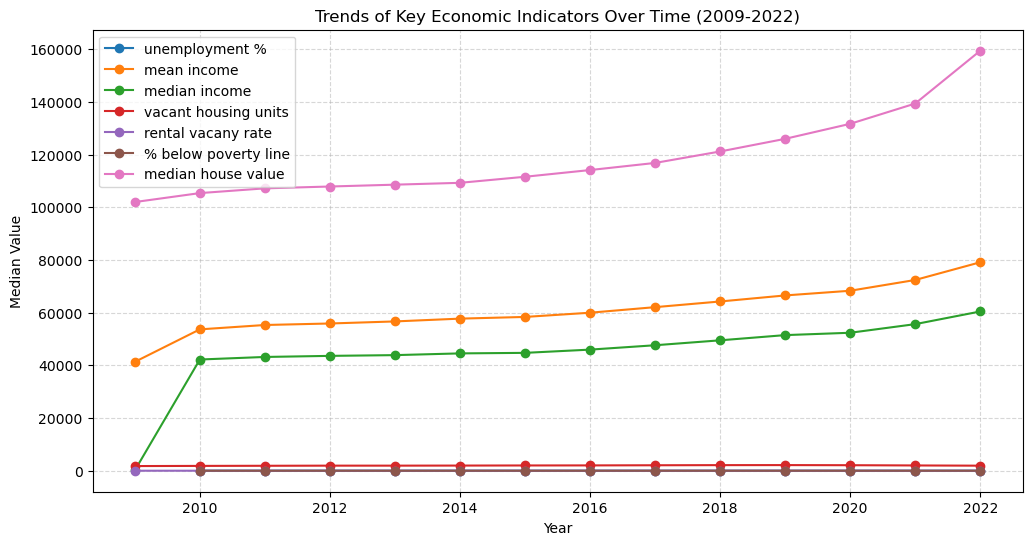

In [7]:
import matplotlib.pyplot as plt

# Select relevant columns for visualization
columns_to_plot = ["unemployment %", "mean income", "median income", 
                   "vacant housing units", "rental vacany rate", "% below poverty line", "median house value"]

# Scale "mil pop" for better visualization
median_values_scaled = median_values.copy()
# median_values_scaled["mil pop"] = median_values_scaled["mil pop"] * 1_000_000

# Plot line chart for trends over time
plt.figure(figsize=(12, 6))

for col in columns_to_plot:
    plt.plot(median_values_scaled.index, median_values_scaled[col], marker="o", label=col)

plt.xlabel("Year")
plt.ylabel("Median Value")
plt.title("Trends of Key Economic Indicators Over Time (2009-2022)")
plt.legend(loc="best")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


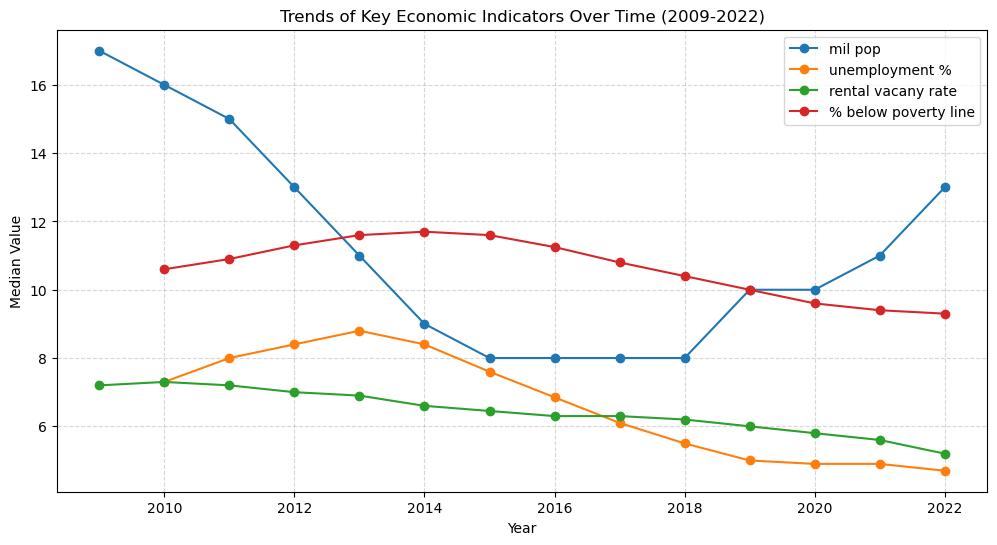

In [8]:
import matplotlib.pyplot as plt

# Select relevant columns for visualization
columns_to_plot = ["mil pop", "unemployment %",
                   "rental vacany rate", "% below poverty line"]

# Plot line chart for trends over time
plt.figure(figsize=(12, 6))

for col in columns_to_plot:
    plt.plot(median_values.index, median_values[col], marker="o", label=col)

plt.xlabel("Year")
plt.ylabel("Median Value")
plt.title("Trends of Key Economic Indicators Over Time (2009-2022)")
plt.legend(loc="best")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


In [ ]:
# Ensure the dataset is loaded properly
import pandas as pd
import os

# Define the correct data folder
data_folder = r"c:\Users\Ankit\Documents\Milestone II project\Milestone_2\Data"
merged_file = os.path.join(data_folder, "merged_census_data.csv")

# Read the dataset
df = pd.read_csv(merged_file)

# Convert numeric columns to the correct data type
numeric_columns = [
    "mil pop", "unemployment %", "mean income", "median income",
    "vacant housing units", "rental vacany rate", "% below poverty line",
    "median house value"
]

# Convert columns to numeric to avoid aggregation errors
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Sort data by county and year for correct difference calculation
df_sorted = df.sort_values(by=["county_name", "Year"])

# Compute population change over years for each county
population_change = df_sorted.groupby("county_name")["mil pop"].apply(lambda x: x.diff().sum())

# Find the county with the highest absolute population change (positive or negative)
max_population_change_county = population_change.abs().idxmax()
max_population_change_value = population_change.loc[max_population_change_county]

# Return the county name and the max change value
max_population_change_county, max_population_change_value

In [9]:
# Ensure the dataset is loaded properly
import pandas as pd
import os

# Define the correct data folder
data_folder = r"c:\Users\Ankit\Documents\Milestone II project\Milestone_2\Data"
merged_file = os.path.join(data_folder, "merged_census_data.csv")

# Read the dataset
df = pd.read_csv(merged_file)

# Convert numeric columns to the correct data type
numeric_columns = [
    "mil pop", "unemployment %", "mean income", "median income",
    "vacant housing units", "rental vacany rate", "% below poverty line",
    "median house value"
]

# Convert columns to numeric to avoid aggregation errors
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Sort data by county and year for correct difference calculation
df_sorted = df.sort_values(by=["county_name", "Year"])

# Compute population change over years for each county
population_change = df_sorted.groupby("county_name")["mil pop"].apply(lambda x: x.diff().sum())

# Find the county with the highest absolute population change (positive or negative)
max_population_change_county = population_change.abs().idxmax()
max_population_change_value = population_change.loc[max_population_change_county]

# Return the county name and the max change value
max_population_change_county, max_population_change_value

('Bell County', 19599.0)

       mil pop  unemployment %  mean income  median income  \
1212      14.0             NaN      22559.0           62.0   
2750   23537.0             NaN      46473.0         2057.0   
3288       0.0             9.8      36482.0        24724.0   
4188   24627.0             7.6      61118.0        48618.0   
6893   24412.0             8.3      62159.0        49466.0   
9092       0.0            11.8      36935.0        25269.0   
9978       0.0            13.5      37488.0        25952.0   
10269  24080.0             8.7      63219.0        50085.0   
13924  22888.0             9.5      63108.0        50060.0   
15853      0.0            12.8      36781.0        26228.0   
16771     13.0            11.8      35361.0        24976.0   
17746  21640.0             9.4      64517.0        51027.0   
19867     14.0            11.6      32781.0        22443.0   
20762  20204.0             9.5      64628.0        50550.0   
23884     18.0            10.6      32901.0        22603.0   
25004  1

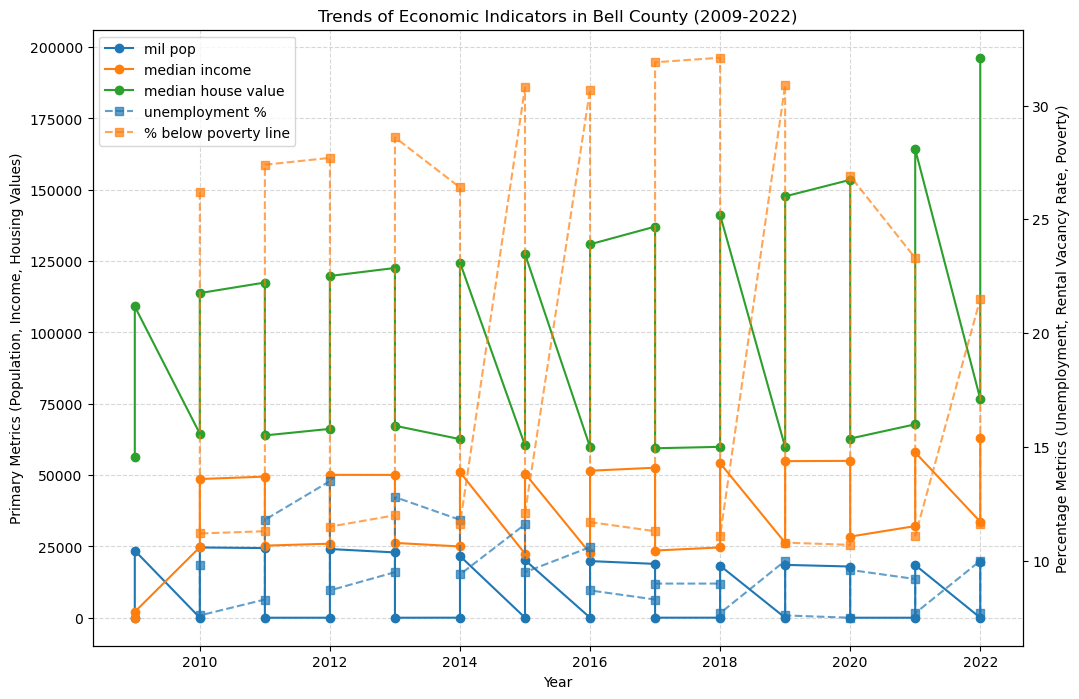

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Define the data folder path
data_folder = r"c:\Users\Ankit\Documents\Milestone II project\Milestone_2\Data"
merged_file = os.path.join(data_folder, "merged_census_data.csv")

# Read the dataset
df = pd.read_csv(merged_file)

# Convert numeric columns to the correct data type
numeric_columns = [
    "mil pop", "unemployment %", "mean income", "median income",
    "vacant housing units", "rental vacany rate", "% below poverty line",
    "median house value"
]

df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Filter data for 'Bell County'
bell_county_df = df[df["county_name"] == "Bell County"]
print(bell_county_df)
# Define columns for the primary and secondary y-axis
primary_columns = ["mil pop", "median income",  "median house value"]
secondary_columns = ["unemployment %",  "% below poverty line"]

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot primary axis data
for col in primary_columns:
    ax1.plot(bell_county_df["Year"], bell_county_df[col], marker="o", label=col)

ax1.set_xlabel("Year")
ax1.set_ylabel("Primary Metrics (Population, Income, Housing Values)")
ax1.set_title("Trends of Economic Indicators in Bell County (2009-2022)")

# Create secondary axis
ax2 = ax1.twinx()
for col in secondary_columns:
    ax2.plot(bell_county_df["Year"], bell_county_df[col], marker="s", linestyle="--", label=col, alpha=0.7)

ax2.set_ylabel("Percentage Metrics (Unemployment, Rental Vacancy Rate, Poverty)")

# Merge legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc="best")

ax1.grid(True, linestyle="--", alpha=0.5)

# Show the plot
plt.show()


In [18]:
df

,mil pop,unemployment %,mean income,median income,vacant housing units,rental vacany rate,% below poverty line,median house value,NAME,state,county,county_name,state_name,Year
0,16.0,NaN,50181.0,87.0,498.0,3.8,NaN,145300.0,"Jefferson County, Idaho",16,51,Jefferson County,Idaho,2009
1,13.0,NaN,40322.0,47.0,663.0,4.7,NaN,130600.0,"Jerome County, Idaho",16,53,Jerome County,Idaho,2009
2,12.0,NaN,45446.0,1072.0,6212.0,3.5,NaN,213000.0,"Kootenai County, Idaho",16,55,Kootenai County,Idaho,2009
3,29.0,NaN,36448.0,196.0,1050.0,5.4,NaN,173200.0,"Latah County, Idaho",16,57,Latah County,Idaho,2009
4,0.0,NaN,38750.0,69.0,1136.0,8.5,NaN,171400.0,"Lemhi County, Idaho",16,59,Lemhi County,Idaho,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45084,19.0,16.3,37287.0,23701.0,5108.0,9.2,38.2,115900.0,"Vega Baja Municipio, Puerto Rico",72,145,Vega Baja Municipio,Puerto Rico,2022
45085,0.0,13.1,21821.0,17062.0,2462.0,19.6,49.0,114500.0,"Vieques Municipio, Puerto Rico",72,147,Vieques Municipio,Puerto Rico,2022
45086,19.0,13.9,33109.0,22461.0,1527.0,0.8,39.4,101900.0,"Villalba Municipio, Puerto Rico",72,149,Villalba Municipio,Puerto Rico,2022
45087,31.0,11.1,27239.0,19972.0,2616.0,1.5,44.8,93900.0,"Yabucoa Municipio, Puerto Rico",72,151,Yabucoa Municipio,Puerto Rico,2022


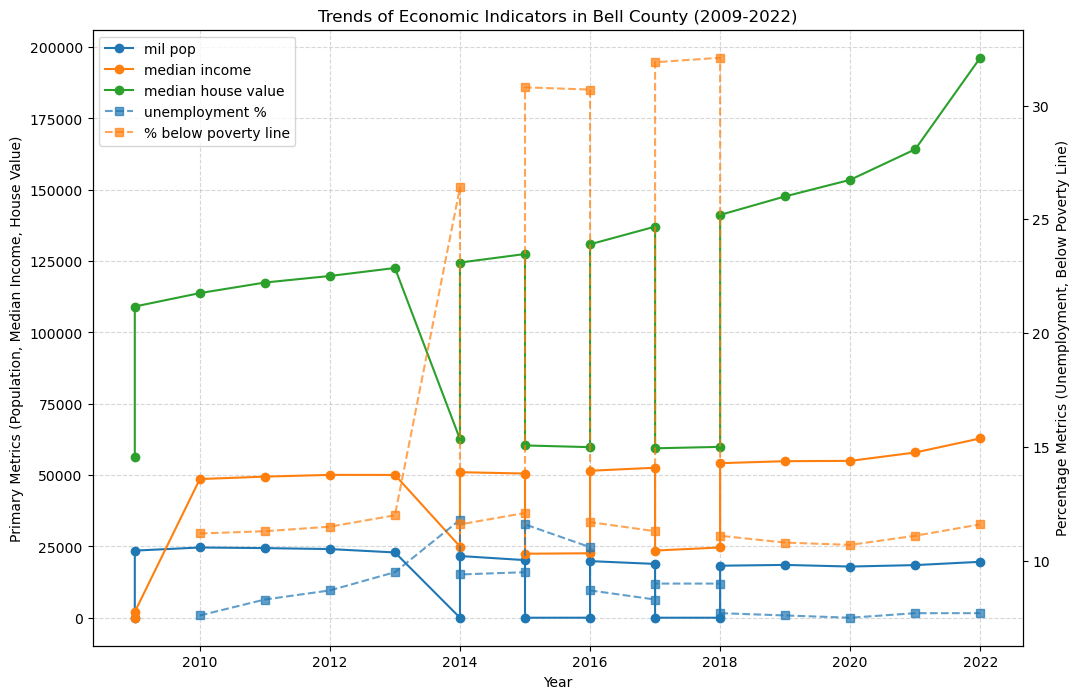

In [17]:
# Drop rows where 'mil pop' is zero or NaN to ensure meaningful visualization
bell_county_df = bell_county_df.dropna(subset=["mil pop"])
bell_county_df = bell_county_df[bell_county_df["mil pop"] > 0]

# Sort by Year for better trend visualization
bell_county_df = bell_county_df.sort_values(by="Year")

# Define columns for the primary and secondary y-axis
primary_columns = ["mil pop", "median income", "median house value"]
secondary_columns = ["unemployment %", "% below poverty line"]

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot primary axis data
for col in primary_columns:
    ax1.plot(bell_county_df["Year"], bell_county_df[col], marker="o", label=col)

ax1.set_xlabel("Year")
ax1.set_ylabel("Primary Metrics (Population, Median Income, House Value)")
ax1.set_title("Trends of Economic Indicators in Bell County (2009-2022)")

# Create secondary axis
ax2 = ax1.twinx()
for col in secondary_columns:
    ax2.plot(bell_county_df["Year"], bell_county_df[col], marker="s", linestyle="--", label=col, alpha=0.7)

ax2.set_ylabel("Percentage Metrics (Unemployment, Below Poverty Line)")

# Merge legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc="best")

ax1.grid(True, linestyle="--", alpha=0.5)

# Show the plot
plt.show()
